# Unit 5 - Financial Planning


In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi


from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv(dotenv_path="keys.env")

alpaca_key = os.getenv("API_KEY")
alpaca_secret_key = os.getenv("SECRET_API_KEY")


print(f"Alpaca Key type: {type(alpaca_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


## Part 1 - Personal Finance Planner

In [3]:
# Set monthly household income
monthly_income = 12000

### Collect Crypto Prices Using the `requests` Library

In [4]:
# Current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [5]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [6]:
# Fetch current BTC price
btc_data = requests.get(btc_url).json()
eth_data = requests.get(eth_url).json()


# Fetch current ETH price
my_btc_price = float(btc_data["data"]["1"]["quotes"]["USD"]["price"])
my_eth_price = float(eth_data["data"]["1027"]["quotes"]["USD"]["price"])



# # Compute current value of my crpto
# my_btc_value = my_btc_price * df_shares.loc["MSFT"]["crpto"]
btc_value = my_btc_price * my_btc
eth_value = my_eth_price * my_eth
# my_eth_value = my_eth_price * df_shares.loc["AAPL"]["crpto"]
print (btc_value)
print (eth_value)

# # Print current crypto wallet balance
# print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
# print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

13756.488
2003.8769999999997


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [7]:
# Current amount of shares
my_agg = 200
my_spy = 50

In [8]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_key = os.getenv("API_KEY")
alpaca_secret_key = os.getenv("SECRET_API_KEY")


# Create the Alpaca API object
type(alpaca_key)
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_key,
    alpaca_secret_key,
    api_version="v2")



In [9]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-07-14", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG

# YOUR CODE HERE!
df_closing = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df
df_closing
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_closing ['AGG']['close'])

spy_close_price = float(df_closing["SPY"]['close'])
# Print AGG and SPY close prices

print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $118.655
Current SPY closing price: $318.89


In [10]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_agg_value = my_spy * spy_close_price
# Print current value of share
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $15944.50
The current value of your 200 AGG shares is $15944.50


### Savings Health Analysis

In [37]:
# Create savings DataFrame
# YOUR CODE HERE!
df_savings = [my_btc + my_eth,my_spy_value + my_agg_value ]
df_Savings  = pd.DataFrame(df_savings,index = ['crypto','stocks'],columns =['amounts'])
# Display savings DataFrame
display(df_Savings)


,amounts
crypto,6.5
stocks,31889.0


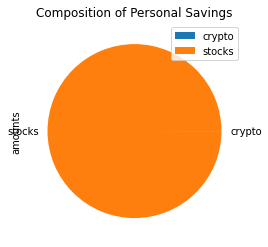

In [12]:
# Plot savings pie chart
df_Savings.plot.pie(y="amounts", title="Composition of Personal Savings")

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3
emergency_fund
# Calculate total amount of savings
# YOUR CODE HERE!
total_savings =[my_btc + my_eth, my_spy_value + my_agg_value, emergency_fund]
total_savings
# Validate saving health

# YOUR CODE HERE!




[6.5, 31889.0, 36000]

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2015-08-07', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-08-07', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
df_5yr = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df
# Display sample data
df_5yr.head()

AGG                                         SPY  \
                             open      high      low   close   volume    open   
2015-08-07 00:00:00-04:00  109.14  109.2750  109.035  109.21  2041167  208.16   
2015-08-10 00:00:00-04:00  109.15  109.1700  108.920  109.06  1149778  209.28   
2015-08-11 00:00:00-04:00  109.42  109.5765  109.284  109.42  1420907  208.98   
2015-08-12 00:00:00-04:00  109.55  109.7100  109.350  109.36  1468979  207.11   
2015-08-13 00:00:00-04:00  109.36  109.3651  109.110  109.15  1465173  208.73   

                                                              
                             high     low   close     volume  
2015-08-07 00:00:00-04:00  208.34  206.87  207.93   87669782  
2015-08-10 00:00:00-04:00  210.67  209.28  210.58   66755890  
2015-08-11 00:00:00-04:00  209.47  207.76  208.63   88424557  
2015-08-12 00:00:00-04:00  209.14  205.36  208.89  136171450  
2015-08-13 00:00:00-04:00  209.55  208.01  208.63   77197796

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 1000

mc_30yrs = MCSimulation(
     portfolio_data = df_5yr,
    num_simulation = num_sims,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
print(mc_30yrs)

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_30yrs.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010807,0.998608,0.992577,0.996162,1.006831,1.005302,1.008453,0.997152,0.998119,0.998597,...,0.997354,1.006212,0.999005,0.999023,1.007424,0.991414,1.000564,0.995195,0.995097,0.995905
2,1.013894,0.996983,0.990810,0.993602,1.008184,0.999133,1.017941,0.993773,1.002197,1.007594,...,0.998224,1.002268,1.000140,1.002602,1.012734,0.990429,1.000385,0.983149,0.987741,0.996157
3,1.013808,1.002395,0.985804,0.987702,1.002176,1.003226,1.016274,0.990569,0.995279,1.005290,...,0.999139,0.997479,0.991881,1.008513,1.013520,0.998523,0.995682,0.994572,1.002491,0.988594
4,1.020116,0.997791,0.987486,0.992156,1.009927,1.006615,1.020005,0.996713,0.991381,1.000807,...,1.005780,1.000668,0.995185,1.010580,1.025745,0.994810,0.983137,0.992556,1.008107,0.992878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,8.452591,5.556026,5.579965,9.459256,6.267889,2.289698,13.278329,2.987449,5.262597,17.517983,...,9.080126,13.219932,28.744821,10.330337,5.705298,10.583441,8.286479,8.166418,8.176950,7.376555
7557,8.445804,5.427415,5.576303,9.471525,6.260430,2.273296,13.262118,2.966314,5.219335,17.456477,...,9.087190,13.188506,28.721876,10.316126,5.719614,10.554236,8.284809,8.194607,8.159087,7.412742
7558,8.431834,5.457084,5.589959,9.485672,6.241996,2.284301,13.233356,2.953218,5.202115,17.514450,...,9.096122,13.272139,28.680121,10.327869,5.717373,10.624353,8.179588,8.153131,8.097189,7.464059
7559,8.473804,5.442402,5.549968,9.461260,6.220287,2.295263,13.358362,2.973295,5.180892,17.305051,...,9.180103,13.144766,28.775561,10.290114,5.662813,10.691745,8.222531,8.191343,8.111678,7.500739


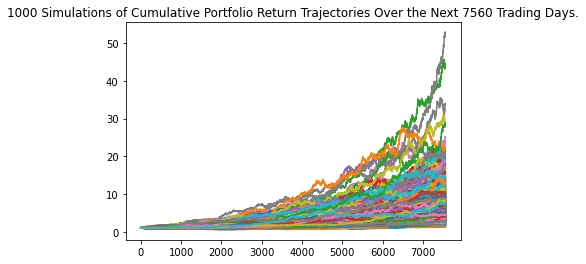

In [19]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = mc_30yrs.plot_simulation()
line_plot.get_figure().savefig("mc_30yrs_sim_plot.png", bbox_inches="tight")

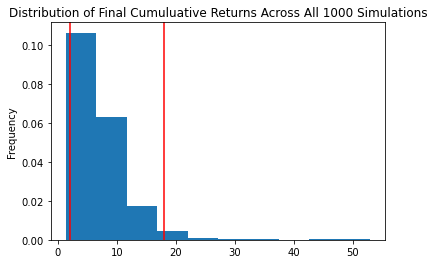

In [20]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = mc_30yrs.plot_distribution()
dist_plot.get_figure().savefig('mc_30yrs_dist_plot.png',box_inches='tight')

### Retirement Analysis

In [23]:
# Fetch summary statistics from the Monte Carlo simulation results
tbl = mc_30yrs.calc_cumulative_return()

# Print summary statistics
print(tbl)

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

### Given an initial investment of $20,000, what is the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [33]:
# Set initial investment
initial_investment = 20000

simulated_return_data = {
    "mean": list(mc_30yrs.simulated_return.mean(axis=1)),
    "median": list(mc_30yrs.simulated_return.median(axis=1)),
    "min": list(mc_30yrs.simulated_return.min(axis=1)),
    "max": list(mc_30yrs.simulated_return.max(axis=1))
}

df_simulated_return = pd.DataFrame(simulated_return_data)

cumulative_return = initial_investment * df_simulated_return

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

tbl =mc_30yrs.summarize_cumulative_return()

ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $44094.44 and $343139.75


In [ ]:
# How would a 50% increase in the initial investment amount affect the expected portfolio return in dollars at the 95% lower and upper confidence intervals?

In [35]:
# Set initial investment
initial_investment2 = 20000 * .5
cumulative_return = initial_investment2 * df_simulated_return


# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!



tbl =mc_30yrs.summarize_cumulative_return()

ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)


# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $66141.67 and $514709.63


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_five)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
print(tbl_ten)

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")